In [1]:
import pandas as pd
import arff
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Loading the frequency data
with open('/Users/ayseljafarova/Desktop/Huk Coburg/freMTPL2freq.arff', 'r') as f:
    data_freq = arff.load(f)
df_freq = pd.DataFrame(data_freq['data'], columns=["IDpol", "ClaimNb", "Exposure", "Area", "VehPower",
                                                   "VehAge", "DrivAge", "BonusMalus", "VehBrand", "VehGas", "Density", "Region"])

# Loading the severity data
with open('/Users/ayseljafarova/Desktop/Huk Coburg/freMTPL2sev.arff', 'r') as f:
    data_sev = arff.load(f)
df_sev = pd.DataFrame(data_sev['data'], columns=["IDpol", "ClaimAmount"])

In [2]:
df_freq.head()

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
0,1.0,1.0,0.10,D,5.0,0.0,55.0,50.0,B12,Regular,1217.0,R82
1,3.0,1.0,0.77,D,5.0,0.0,55.0,50.0,B12,Regular,1217.0,R82
2,5.0,1.0,0.75,B,6.0,2.0,52.0,50.0,B12,Diesel,54.0,R22
3,10.0,1.0,0.09,B,7.0,0.0,46.0,50.0,B12,Diesel,76.0,R72
4,11.0,1.0,0.84,B,7.0,0.0,46.0,50.0,B12,Diesel,76.0,R72


In [3]:
df_freq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678013 entries, 0 to 678012
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   IDpol       678013 non-null  float64
 1   ClaimNb     678013 non-null  float64
 2   Exposure    678013 non-null  float64
 3   Area        678013 non-null  object 
 4   VehPower    678013 non-null  float64
 5   VehAge      678013 non-null  float64
 6   DrivAge     678013 non-null  float64
 7   BonusMalus  678013 non-null  float64
 8   VehBrand    678013 non-null  object 
 9   VehGas      678013 non-null  object 
 10  Density     678013 non-null  float64
 11  Region      678013 non-null  object 
dtypes: float64(8), object(4)
memory usage: 62.1+ MB


In [4]:
df_sev.head()

,IDpol,ClaimAmount
0,1552.0,995.20
1,1010996.0,1128.12
2,4024277.0,1851.11
3,4007252.0,1204.00
4,4046424.0,1204.00


In [5]:
df_sev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26639 entries, 0 to 26638
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   IDpol        26639 non-null  float64
 1   ClaimAmount  26639 non-null  float64
dtypes: float64(2)
memory usage: 416.4 KB


In [6]:
#Left join we want to keep all policies from freMTPL2freq, even if they have no claims
data = pd.merge(df_freq, df_sev, on='IDpol', how='left')
data.head()

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,ClaimAmount
0,1.0,1.0,0.10,D,5.0,0.0,55.0,50.0,B12,Regular,1217.0,R82,NaN
1,3.0,1.0,0.77,D,5.0,0.0,55.0,50.0,B12,Regular,1217.0,R82,NaN
2,5.0,1.0,0.75,B,6.0,2.0,52.0,50.0,B12,Diesel,54.0,R22,NaN
3,10.0,1.0,0.09,B,7.0,0.0,46.0,50.0,B12,Diesel,76.0,R72,NaN
4,11.0,1.0,0.84,B,7.0,0.0,46.0,50.0,B12,Diesel,76.0,R72,NaN


In [7]:
data.dropna(subset=['ClaimAmount'], inplace=True)
data['ClaimAmount'].value_counts()

ClaimAmount
1204.00    4792
1128.12    3056
1172.00    2071
1128.00     831
602.00      433
           ... 
783.92        1
489.72        1
832.33        1
63.28         1
576.53        1
Name: count, Length: 12255, dtype: int64

In [8]:
data["ClaimNb"].value_counts()

ClaimNb
1.0     23570
2.0      2597
3.0       186
11.0       22
4.0        20
16.0       16
5.0        10
9.0         9
8.0         8
6.0         6
Name: count, dtype: int64

In [17]:
idpol_counts = data['IDpol'].value_counts()
duplicated_idpol = idpol_counts[idpol_counts > 1].index
duplicate_rows = data[data['IDpol'].isin(duplicated_idpol)]

print(f'Number of duplicate rows: {duplicate_rows.shape[0]}')
duplicate_rows

Number of duplicate rows: 2873


,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,ClaimAmount,TotalClaimAmount,TotalExposure,AvgClaimAmountPerExposure
205,424.0,2.0,0.62,F,10.0,0.0,51.0,100.0,B12,Regular,27000.0,R11,989.64,10834.00,1.24,8737.096774
206,424.0,2.0,0.62,F,10.0,0.0,51.0,100.0,B12,Regular,27000.0,R11,9844.36,10834.00,1.24,8737.096774
747,1552.0,2.0,0.59,D,11.0,0.0,39.0,56.0,B12,Diesel,778.0,R22,995.20,2840.94,1.18,2407.576271
748,1552.0,2.0,0.59,D,11.0,0.0,39.0,56.0,B12,Diesel,778.0,R22,1845.74,2840.94,1.18,2407.576271
1005,2085.0,2.0,0.69,C,9.0,0.0,50.0,50.0,B12,Regular,353.0,R72,1469.88,1852.28,1.38,1342.231884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676522,6111342.0,2.0,0.57,E,7.0,9.0,24.0,76.0,B12,Regular,2212.0,R82,7490.00,7811.00,1.14,6851.754386
678681,6113501.0,2.0,0.09,E,4.0,1.0,35.0,50.0,B12,Regular,3317.0,R93,7700.00,9024.40,0.18,50135.555556
678682,6113501.0,2.0,0.09,E,4.0,1.0,35.0,50.0,B12,Regular,3317.0,R93,1324.40,9024.40,0.18,50135.555556
679015,6113834.0,2.0,0.17,C,15.0,3.0,36.0,50.0,B12,Regular,181.0,R54,10290.00,12230.40,0.34,35971.764706


In [10]:
columns_to_check = ['Region', 'VehGas', 'VehBrand', 'Area', 'VehPower', 'VehAge']

for column in columns_to_check:
    value_counts = data[column].value_counts().reset_index()
    value_counts.columns = [column, 'Count']
    display(value_counts)

,Region,Count
0,R24,6475
1,R82,4233
2,R93,2986
3,R11,2591
4,R53,1871
5,R52,1576
6,R91,1068
7,R72,1055
8,R31,944
9,R54,800


,VehGas,Count
0,Diesel,13450
1,Regular,12994


,VehBrand,Count
0,B1,6898
1,B2,6805
2,B12,4200
3,B3,2429
4,B5,1662
5,B6,1252
6,B4,1099
7,B10,765
8,B11,664
9,B13,539


,Area,Count
0,C,7093
1,D,6458
2,E,6122
3,A,3364
4,B,2633
5,F,774


,VehPower,Count
0,6.0,6305
1,7.0,5593
2,5.0,5115
3,4.0,4003
4,8.0,1645
5,9.0,1220
6,10.0,1217
7,11.0,714
8,12.0,296
9,13.0,139


,VehAge,Count
0,1.0,2328
1,2.0,2238
2,3.0,1873
3,4.0,1793
4,5.0,1678
5,6.0,1671
6,7.0,1657
7,10.0,1643
8,9.0,1549
9,8.0,1489


In [11]:
data['TotalClaimAmount'] = data.groupby('IDpol')['ClaimAmount'].transform('sum')
data['TotalExposure'] = data.groupby('IDpol')['Exposure'].transform('sum')
data['AvgClaimAmountPerExposure'] = data['TotalClaimAmount'] / data['TotalExposure']
data['AvgClaimAmountPerExposure'].replace([float('inf'), -float('inf')], float('nan'), inplace=True)

In [12]:
print(data.isnull().sum())
data.ClaimNb.value_counts()

IDpol                        0
ClaimNb                      0
Exposure                     0
Area                         0
VehPower                     0
VehAge                       0
DrivAge                      0
BonusMalus                   0
VehBrand                     0
VehGas                       0
Density                      0
Region                       0
ClaimAmount                  0
TotalClaimAmount             0
TotalExposure                0
AvgClaimAmountPerExposure    0
dtype: int64


ClaimNb
1.0     23570
2.0      2597
3.0       186
11.0       22
4.0        20
16.0       16
5.0        10
9.0         9
8.0         8
6.0         6
Name: count, dtype: int64

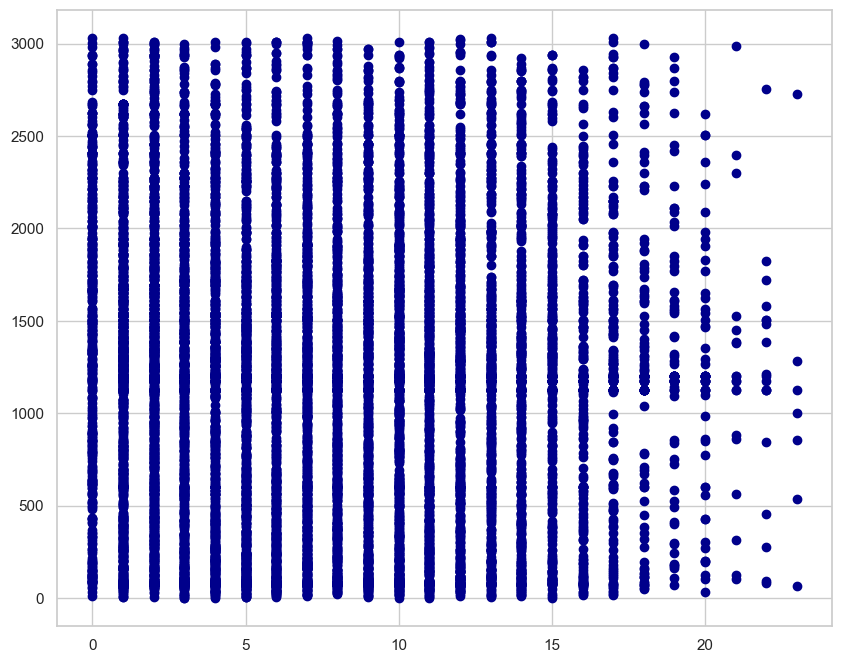

In [22]:
numerical_cols = data.select_dtypes(include=['number']).columns
for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

plt.figure(figsize=(10, 8))
plt.scatter(data['VehAge'], data['AvgClaimAmountPerExposure'], color='darkblue')
plt.show()

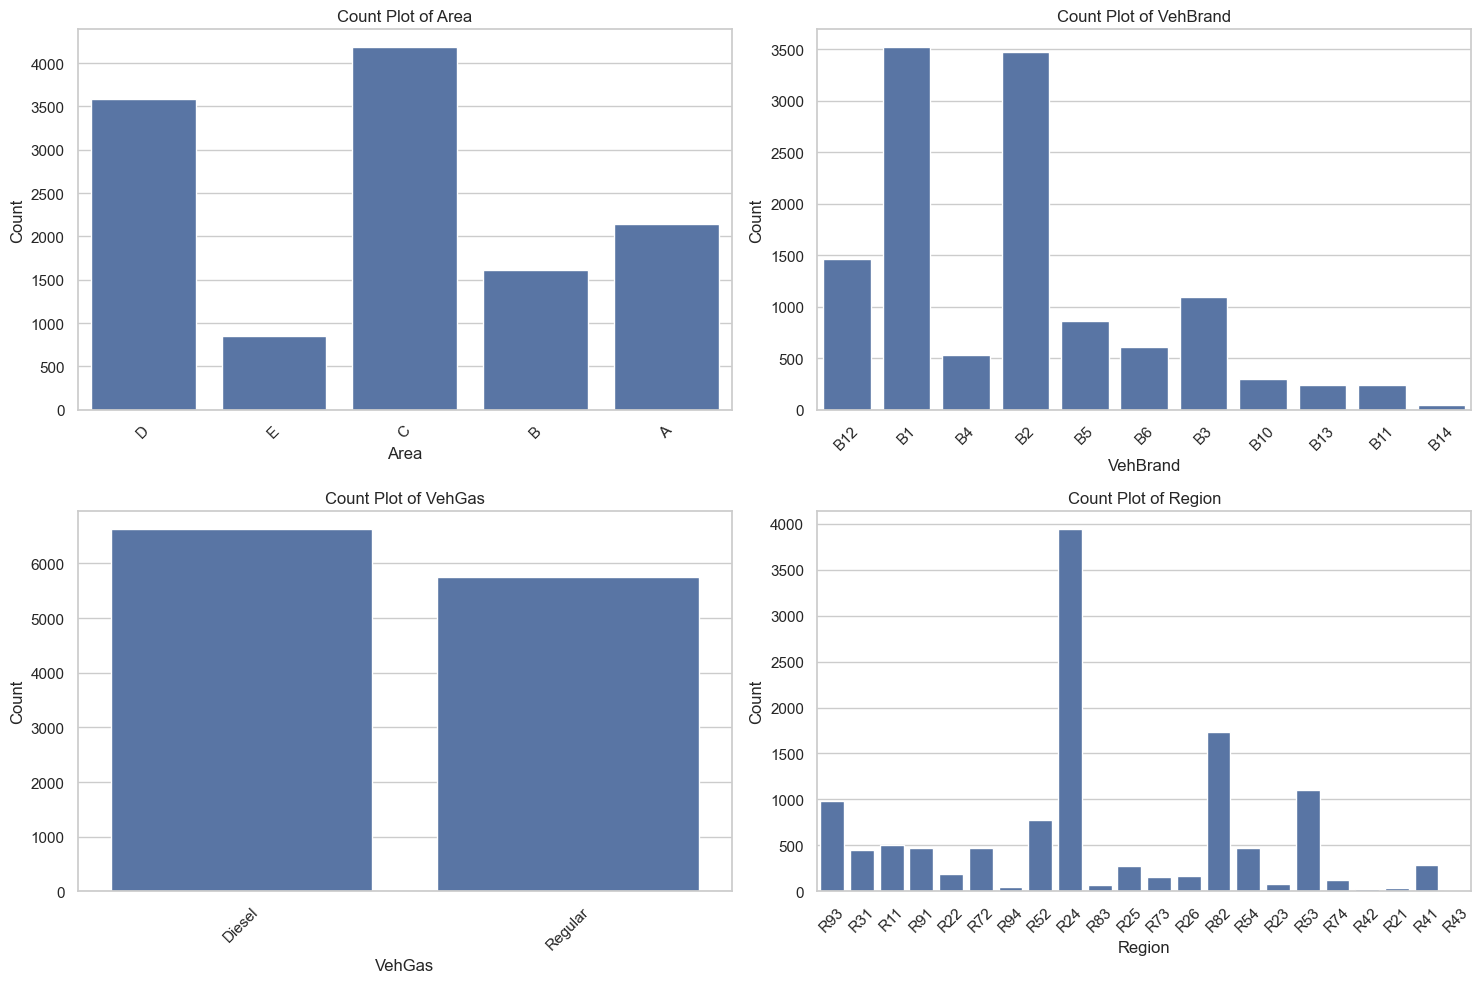

Random Forest Model:
Mean Squared Error: 391364.0259744899
R^2 Score: 0.21109497217843787
Training Score: 0.8839456735419848
Test Score: 0.21109497217843787

Lasso Model:
Mean Squared Error: 387829.8354114773
R^2 Score: 0.21821913413353267
Training Score: 0.18530725800204806
Test Score: 0.21821913413353267

Linear Regression Model:
Mean Squared Error: 387845.97337279085
R^2 Score: 0.21818660350226848
Training Score: 0.18539727642714798
Test Score: 0.21818660350226848


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import mean_squared_error, r2_score

categorical_cols = ['Area', 'VehBrand', 'VehGas', 'Region']

sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()
for i, col in enumerate(categorical_cols):
    sns.countplot(data=data, x=col, ax=axes[i])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

X = data.drop(columns=['AvgClaimAmountPerExposure', 'IDpol', "ClaimAmount", 'TotalExposure', 'TotalClaimAmount'])  
y = data['AvgClaimAmountPerExposure'] 

categorical_cols = ['Area', 'VehGas']
frequency_encoded_cols = ['Region', 'VehBrand']
numerical_cols = [col for col in X.columns if col not in categorical_cols + frequency_encoded_cols]

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
lasso_model = Lasso(alpha=1.0, random_state=42)
linear_model = LinearRegression()

# Pipelines
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', rf_model)])

lasso_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('model', lasso_model)])

linear_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('model', linear_model)])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest
rf_pipeline.fit(X_train, y_train)
rf_y_pred = rf_pipeline.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)
rf_train_score = rf_pipeline.score(X_train, y_train)
rf_test_score = rf_pipeline.score(X_test, y_test)

print('Random Forest Model:')
print(f'Mean Squared Error: {rf_mse}')
print(f'R^2 Score: {rf_r2}')
print(f'Training Score: {rf_train_score}')
print(f'Test Score: {rf_test_score}')

# Lasso
lasso_pipeline.fit(X_train, y_train)
lasso_y_pred = lasso_pipeline.predict(X_test)

lasso_mse = mean_squared_error(y_test, lasso_y_pred)
lasso_r2 = r2_score(y_test, lasso_y_pred)
lasso_train_score = lasso_pipeline.score(X_train, y_train)
lasso_test_score = lasso_pipeline.score(X_test, y_test)

print('\nLasso Model:')
print(f'Mean Squared Error: {lasso_mse}')
print(f'R^2 Score: {lasso_r2}')
print(f'Training Score: {lasso_train_score}')
print(f'Test Score: {lasso_test_score}')

# Linear Regression
linear_pipeline.fit(X_train, y_train)
linear_y_pred = linear_pipeline.predict(X_test)

linear_mse = mean_squared_error(y_test, linear_y_pred)
linear_r2 = r2_score(y_test, linear_y_pred)
linear_train_score = linear_pipeline.score(X_train, y_train)
linear_test_score = linear_pipeline.score(X_test, y_test)

print('\nLinear Regression Model:')
print(f'Mean Squared Error: {linear_mse}')
print(f'R^2 Score: {linear_r2}')
print(f'Training Score: {linear_train_score}')
print(f'Test Score: {linear_test_score}')

## Die Performance und die Metriken sind nicht so gut, könnten aber verbessert werden. Da meine Aufgabe nur das Modellieren war, habe ich nicht viel Zeit darauf verwendet, die Metriken oder die Datenvorverarbeitung zu verbessern

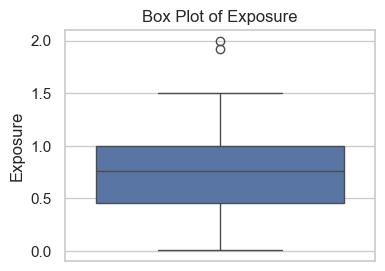

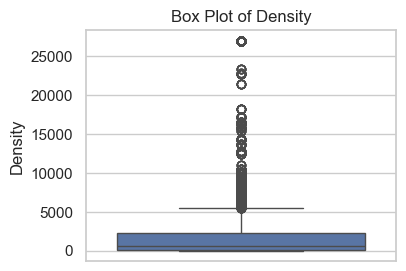

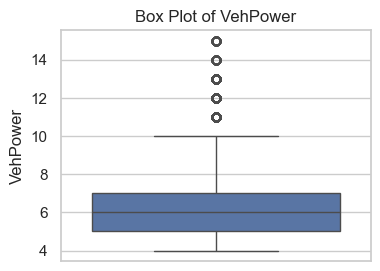

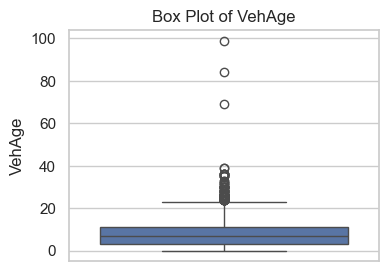

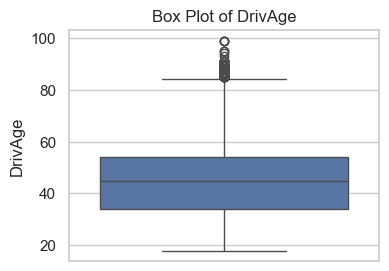

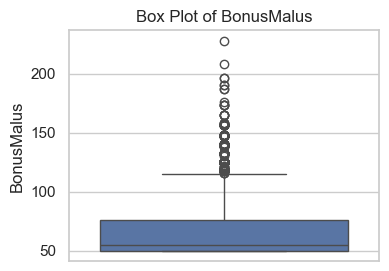

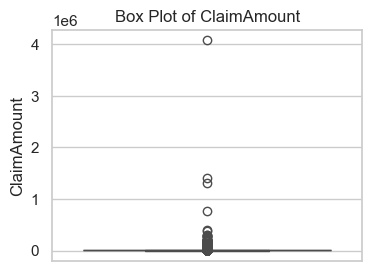

In [14]:
# List of numerical columns to plot
numerical_columns = ['Exposure', 'Density', 'VehPower', 'VehAge', 'DrivAge', 'BonusMalus', 'ClaimAmount']
for column in numerical_columns:
    plt.figure(figsize=(4, 3))
    sns.boxplot(y=data[column].values)
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)
    plt.show()

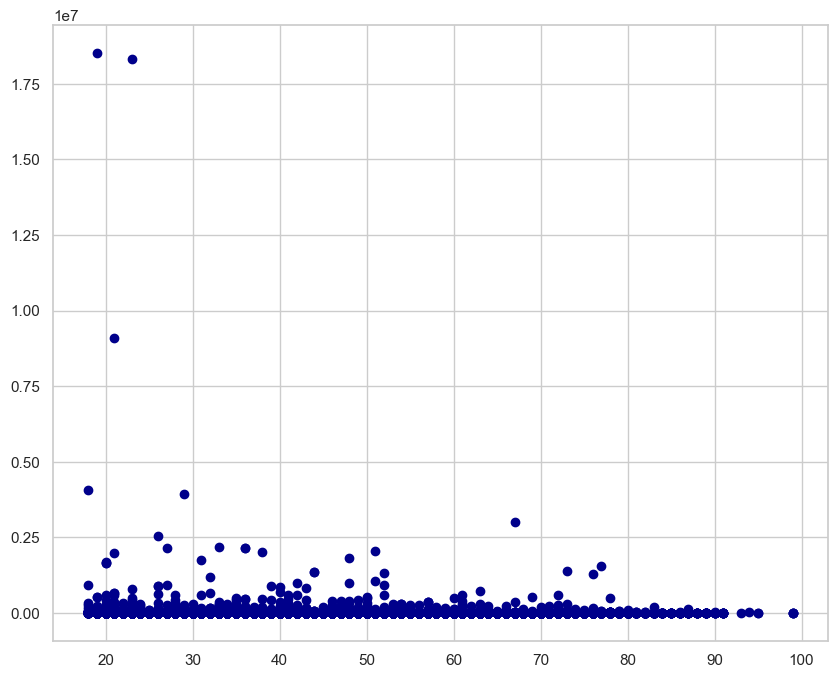

In [20]:
plt.figure(figsize= (10,8))
plt.scatter(data['DrivAge'], data.AvgClaimAmountPerExposure, color = 'darkblue');

In [142]:

data = pd.get_dummies(data, columns=['Area', 'VehGas'], drop_first=True)
region_freq = data['Region'].value_counts().to_dict()
vehbrand_freq = data['VehBrand'].value_counts().to_dict()

data['Region'] = data['Region'].map(region_freq)
data['VehBrand'] = data['VehBrand'].map(vehbrand_freq)
data.head()

,IDpol,ClaimAmount,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,Density,Region,AvgClaimPerYear,Area_B,Area_C,Area_D,Area_E,Area_F,VehGas_Regular
0,139.0,303.00,1.0,0.75,7.0,1.0,61.0,50.0,3826,27000.0,2393,404.000000,False,False,False,False,True,True
1,190.0,1981.84,1.0,0.14,12.0,5.0,50.0,60.0,3826,56.0,429,14156.000000,True,False,False,False,False,False
2,414.0,1456.55,1.0,0.14,4.0,0.0,36.0,85.0,3826,4792.0,2393,10403.928571,False,False,False,True,False,True
3,424.0,10834.00,4.0,1.24,10.0,0.0,51.0,100.0,3826,27000.0,2393,8737.096774,False,False,False,False,True,True
4,463.0,3986.67,1.0,0.31,5.0,0.0,45.0,50.0,3826,12.0,350,12860.225806,False,False,False,False,False,True


Pearson Correlation Matrix:


,IDpol,ClaimAmount,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,Density,Region,AvgClaimPerYear,Area_B,Area_C,Area_D,Area_E,Area_F,VehGas_Regular
IDpol,1.000000,-0.003114,0.018496,-0.071008,0.059482,-0.095685,0.054924,-0.025230,-0.048775,0.066987,-0.098707,-0.004654,-0.019878,-0.015770,-0.000661,0.029254,0.054644,-0.032192
ClaimAmount,-0.003114,1.000000,0.021334,-0.012679,0.006226,0.008047,-0.016527,0.020335,0.004975,-0.003980,0.013608,0.669977,0.012351,-0.004631,-0.000084,-0.002099,-0.004236,0.007704
ClaimNb,0.018496,0.021334,1.000000,0.228680,-0.015343,-0.000355,0.002673,0.015586,0.007843,0.008874,-0.029460,0.000847,-0.011760,-0.011524,0.023472,0.007175,0.004426,0.011044
Exposure,-0.071008,-0.012679,0.228680,1.000000,-0.012345,-0.005277,0.163257,-0.076300,0.032745,-0.026370,0.037224,-0.066579,0.012430,0.022048,-0.020957,-0.024947,-0.020122,-0.005520
VehPower,0.059482,0.006226,-0.015343,-0.012345,1.000000,-0.015646,0.022266,-0.069155,-0.170943,0.045348,-0.020053,0.001169,-0.008697,-0.003642,-0.002231,0.001009,0.039280,-0.022434
VehAge,-0.095685,0.008047,-0.000355,-0.005277,-0.015646,1.000000,-0.071705,0.138950,0.100118,-0.077709,0.124469,0.005355,0.023490,-0.012767,0.007904,-0.024483,-0.073121,0.117450
DrivAge,0.054924,-0.016527,0.002673,0.163257,0.022266,-0.071705,1.000000,-0.471575,0.050695,0.001863,0.016899,-0.027188,0.003801,0.016373,-0.024211,-0.028955,0.013579,0.056472
BonusMalus,-0.025230,0.020335,0.015586,-0.076300,-0.069155,0.138950,-0.471575,1.000000,0.008867,0.047665,0.024996,0.022367,-0.026613,-0.049716,0.035408,0.064564,0.017305,0.045195
VehBrand,-0.048775,0.004975,0.007843,0.032745,-0.170943,0.100118,0.050695,0.008867,1.000000,-0.057594,0.080279,0.010655,0.041984,0.021417,-0.032674,-0.060100,-0.032420,0.008384
Density,0.066987,-0.003980,0.008874,-0.026370,0.045348,-0.077709,0.001863,0.047665,-0.057594,1.000000,-0.081628,-0.003385,-0.155676,-0.255581,-0.122761,0.320570,0.840359,0.106708



Spearman Correlation Matrix:


,IDpol,ClaimAmount,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,Density,Region,AvgClaimPerYear,Area_B,Area_C,Area_D,Area_E,Area_F,VehGas_Regular
IDpol,1.000000,0.201259,0.038232,-0.084090,0.042196,-0.070578,0.047104,-0.031933,-0.050317,0.046697,-0.071009,0.128677,-0.020233,-0.011188,-0.002338,0.031831,0.040655,-0.038310
ClaimAmount,0.201259,1.000000,0.263080,-0.030908,0.017840,-0.051464,0.020928,0.061514,-0.016414,0.023128,-0.036320,0.734419,-0.009599,-0.004240,0.009047,0.016756,-0.003520,-0.013342
ClaimNb,0.038232,0.263080,1.000000,0.266556,-0.001273,-0.035368,-0.010286,0.065134,-0.010148,0.045126,-0.040266,0.031309,-0.018234,-0.008702,0.003944,0.033278,0.019736,-0.004285
Exposure,-0.084090,-0.030908,0.266556,1.000000,-0.016942,0.019592,0.185162,-0.117915,0.046570,-0.066721,0.056288,-0.585423,0.021056,0.031019,-0.026728,-0.042247,-0.026302,-0.001744
VehPower,0.042196,0.017840,-0.001273,-0.016942,1.000000,-0.009940,0.031241,-0.057878,-0.125028,0.007697,0.001642,0.014032,-0.004035,-0.001695,0.000680,-0.005067,0.021118,-0.058731
VehAge,-0.070578,-0.051464,-0.035368,0.019592,-0.009940,1.000000,-0.084359,0.135341,0.117727,-0.064829,0.117178,-0.041071,0.024072,-0.011710,0.013243,-0.027269,-0.080229,0.114431
DrivAge,0.047104,0.020928,-0.010286,0.185162,0.031241,-0.084359,1.000000,-0.523616,0.032011,-0.038135,0.017892,-0.084616,0.003388,0.019674,-0.022184,-0.031391,0.012893,0.043597
BonusMalus,-0.031933,0.061514,0.065134,-0.117915,-0.057878,0.135341,-0.523616,1.000000,0.002403,0.104685,0.013843,0.112923,-0.024961,-0.057583,0.031300,0.076945,0.023714,0.028852
VehBrand,-0.050317,-0.016414,-0.010148,0.046570,-0.125028,0.117727,0.032011,0.002403,1.000000,-0.093925,0.073786,-0.030017,0.038651,0.020523,-0.030832,-0.053855,-0.033114,0.022302
Density,0.046697,0.023128,0.045126,-0.066721,0.007697,-0.064829,-0.038135,0.104685,-0.093925,1.000000,-0.109128,0.049759,-0.371534,-0.282464,0.238759,0.673246,0.288623,0.133339


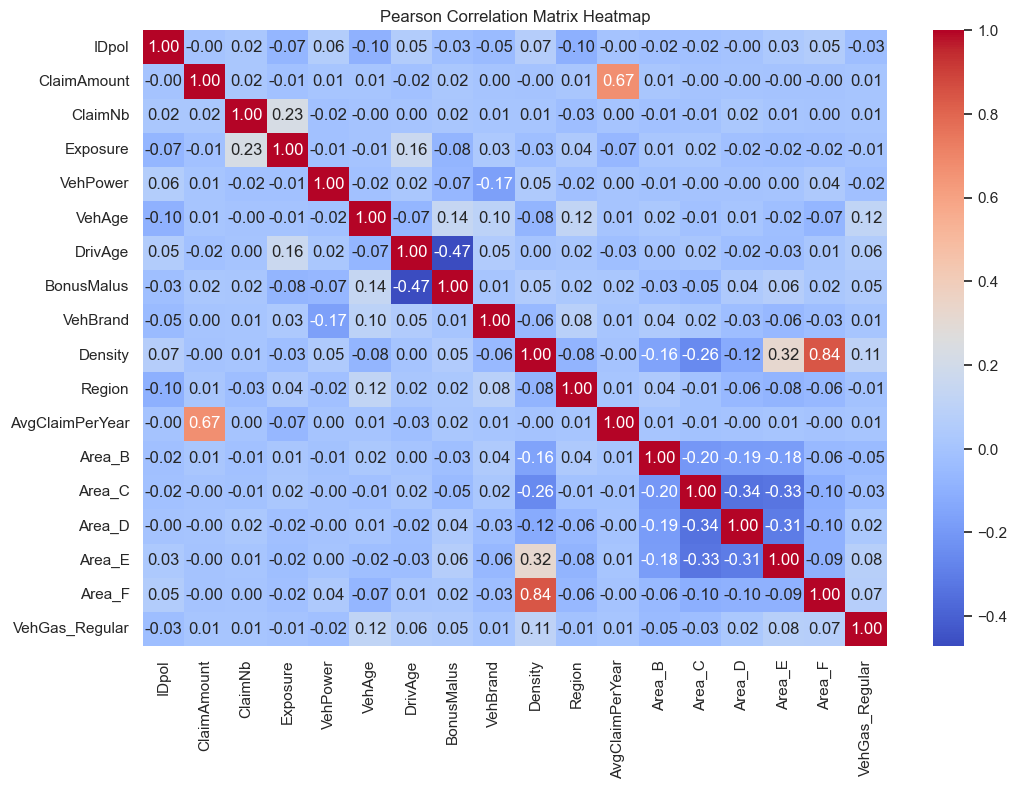

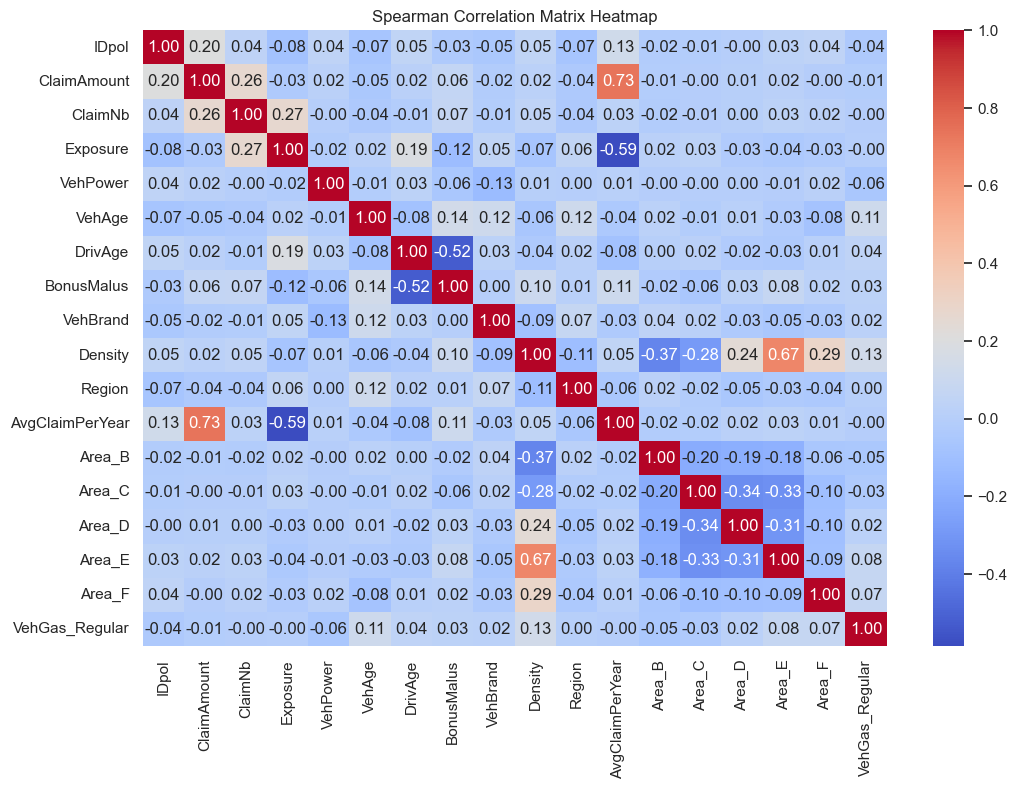

In [143]:
pearson_corr = data.corr(method='pearson')
spearman_corr = data.corr(method='spearman')
print("Pearson Correlation Matrix:")
display(pearson_corr)

print("\nSpearman Correlation Matrix:")
display(spearman_corr)

plt.figure(figsize=(12, 8))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Pearson Correlation Matrix Heatmap')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Spearman Correlation Matrix Heatmap')
plt.show()

In [144]:
# Extract the trained model from the pipeline
trained_model = pipeline.named_steps['model']
feature_importances = trained_model.feature_importances_
print(feature_importances)

[3.98340270e-03 1.85125920e-01 1.15019166e-01 1.98617420e-01
 1.07400301e-01 3.59272050e-02 1.53250181e-01 1.07023154e-01
 4.55678082e-03 1.53309168e-02 5.18374615e-02 7.10175232e-05
 2.18570728e-02]
